In [2]:
import numpy as np
import matplotlib.pyplot
%matplotlib inline

In [8]:
a=np.arange(6)
a = a.reshape(3,2)
a

array([[0, 1],
       [2, 3],
       [4, 5]])

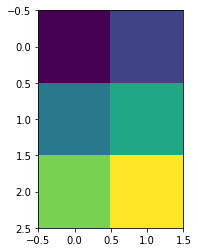

In [9]:
matplotlib.pyplot.imshow(a, interpolation="nearest")

In [17]:
from NeuralNetwork import NeuralNetwork
n = NeuralNetwork(3,3,3,0.3)
n